In [1]:
# time series forecasting fundamental with tensorflow and possibly the milestone project
# writing some tensorflow code to predict the price of bitcoin based on previous data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-11 06:03:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-07-11 06:03:16 (6.01 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                      parse_dates = ["Date"],
                      index_col = ["Date"]) #parse the date column and tell pandas that the columns we r using is actually a date time fromat
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
len(df)

2787

In [4]:
# this here is an import done using pandas in python
# finally we will start and continue with some code
# only want closing price for each date based on th ecloosing price given in our dataframe

bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})

bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 0, 'Date')

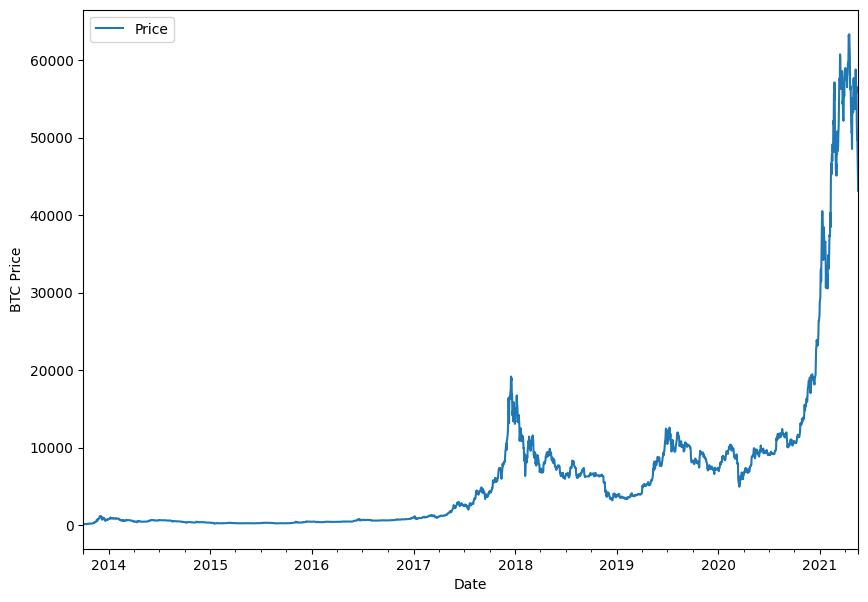

In [5]:
# visualising the dataset
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize = (10,7))
plt.ylabel("BTC Price")
plt.xlabel("Date")

In [6]:
# making use of python csv module instead of pandas module
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #getting the dates as dates and not as string
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'new plot')

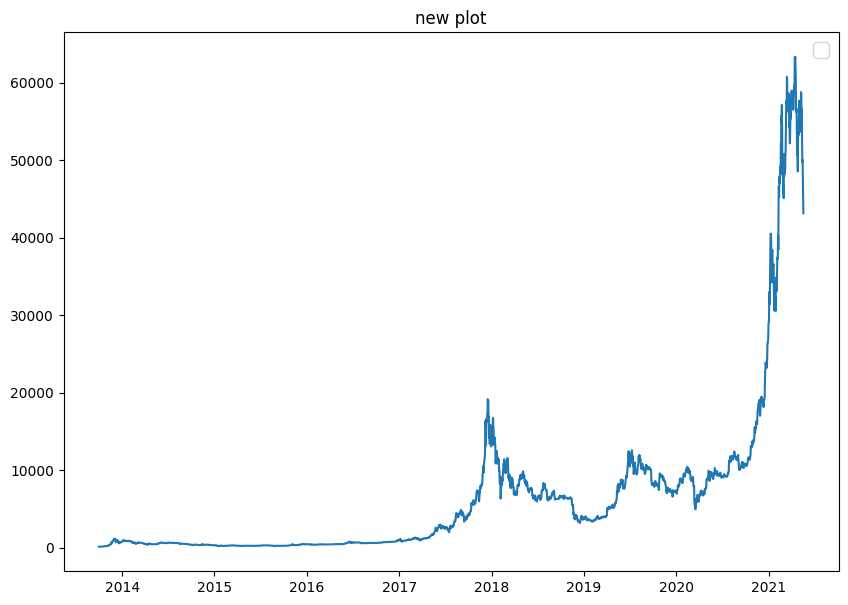

In [7]:
#plot from csv
import numpy as np
plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)
plt.legend(fontsize = 14);
plt.title("new plot")

In [8]:
# creating the training and testing splits out of the time series data
# creating training and test splits the wrong way
from sklearn.model_selection import train_test_split
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()



In [9]:
x_train, x_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

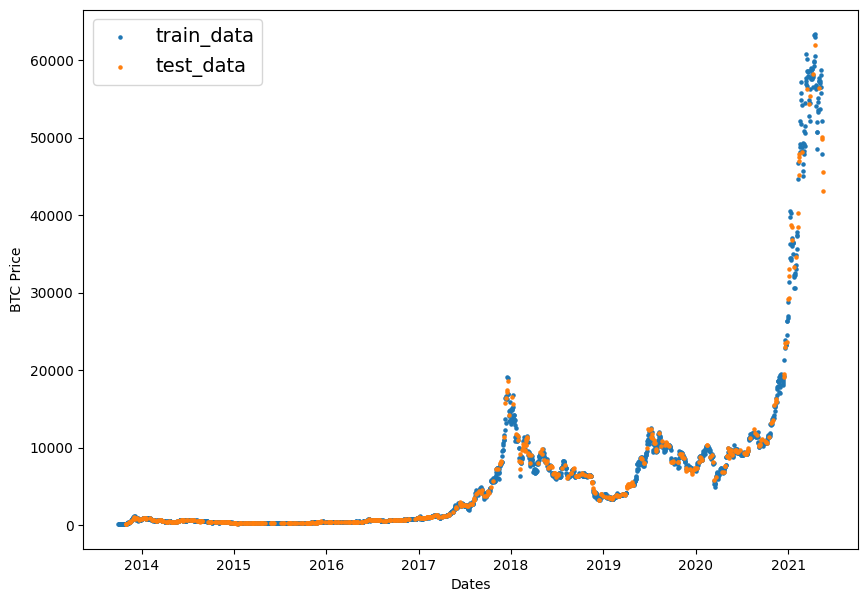

In [11]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train, s= 5, label = "train_data")
plt.scatter(x_test, y_test, s = 5, label = "test_data")
plt.xlabel("Dates")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)

In [12]:
# why is this the wrong way of prediction and splitting
# the main intention of time series forecasting is to be able to predict the events of the future. But it so happens
# that thr training and the testing split we have created contatins the data from the present. which meanss that we need
# data from the past to be able to predict the data for the future but instead our testing data anf training data is
# spread in the same time period.


# the best possible way to perform a split for something like this would be to take the data and split it ino two
# distinct chunks instead od having it spread all over the place

In [13]:
split_size = int(0.8 * len(prices))
x_train_date, y_train_date = timesteps[:split_size], prices[:split_size]
# creating the test data split
x_test_date, y_test_date = timesteps[split_size:], prices[split_size:]

In [14]:
len(x_train), len(x_test)

(2229, 558)

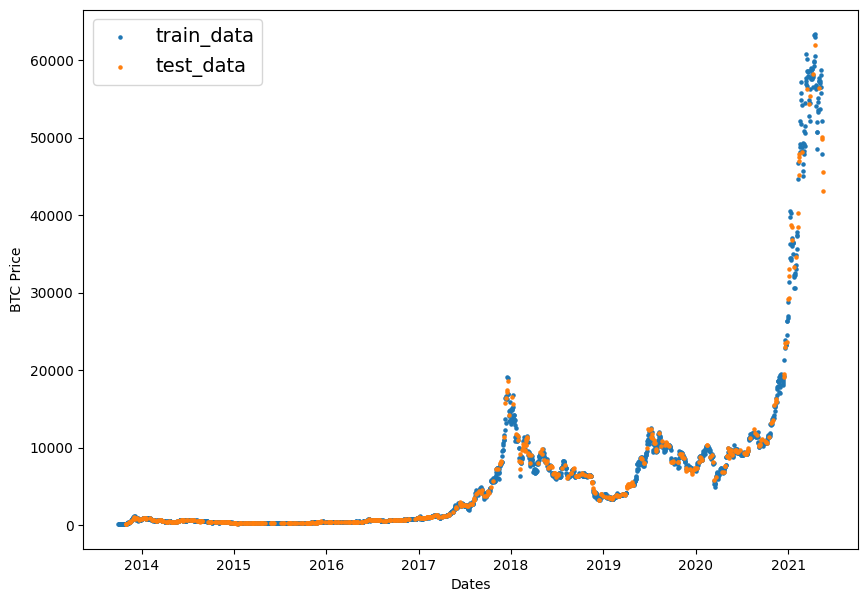

In [15]:
# plotting the new splits?

plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train, s= 5, label = "train_data")
plt.scatter(x_test, y_test, s = 5, label = "test_data")
plt.xlabel("Dates")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)

In [16]:
# working on creating the plotting function
# modelling experiments to model and forecast the data
# building the first naive model for forecasting which will also be acting as our baseline

naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([ 7954.00623772, 56427.04312502,  4186.78374   ,  9906.40796505,
        10983.21600203,   618.79      ,  9737.45855879,   519.015     ,
        11452.23      ,   602.4075    ]),
 array([ 606.8975    ,  682.226     ,  604.465     , 1077.557     ,
        9226.48582088,  270.813     , 4160.535     ,  651.285     ,
        8030.57      , 3920.99125   ]))

In [17]:
y_test[-10:]

array([ 682.226     ,  604.465     , 1077.557     , 9226.48582088,
        270.813     , 4160.535     ,  651.285     , 8030.57      ,
       3920.99125   ,  581.51      ])

In [18]:
y_test[-10:]

array([ 682.226     ,  604.465     , 1077.557     , 9226.48582088,
        270.813     , 4160.535     ,  651.285     , 8030.57      ,
       3920.99125   ,  581.51      ])

In [19]:
import tensorflow as tf
#implementing MASE

def MASE(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive

In [20]:
MASE(y_test[1:], naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0088164083857942>

In [21]:
# creating a function for evaluation of the model being trained and returning the value in the form of dictionary
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = MASE(y_true, y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_test[1:],
                               naive_forecast)

In [23]:
naive_results

{'mae': 8273.145,
 'mse': 195112260.0,
 'rmse': 13968.259,
 'mape': 742.20264,
 'mase': 1.0088165}

In [24]:
# we are ready to start building our models now
# windowing our time series dataset so that we can turn it into a supervised learning problem

x_train, y_train

(array(['2015-05-23T00:00:00.000000000', '2017-11-27T00:00:00.000000000',
        '2019-06-01T00:00:00.000000000', ...,
        '2016-11-04T00:00:00.000000000', '2017-04-17T00:00:00.000000000',
        '2016-02-08T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([ 240.1588    , 9573.9675    , 8513.20388193, ...,  701.21875   ,
        1184.2       ,  376.924     ]))

In [25]:
# we will be writing a function to format the data into windows so that our horizon prediction is good enough

In [26]:
HORIZON = 1 # THIS IS THE PREDICITON WE WANT TO WORK ON
WINDOW_SIZE = 7 #THIS IS THE DATA WE WILL BE USING FOR PREDICTION

In [27]:
# CREATING A FUNCTION TO LABEL WINDOWD DATA

def get_labelled_window(x, horizon = HORIZON):
  """
  Create labels for windowed dataset
  """
  return x[:,:-horizon],x[:,-horizon:]

In [28]:
# testing if the window labelling function actually works
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [29]:
x_train.shape

(2229,)

In [30]:
start = 0
window, labels = [],[]
while start<len(btc_price) - 8:
  arr = btc_price[start:start+8]
  data, label = get_labelled_window(tf.expand_dims(arr,axis = 0))
  window.append(data)
  labels.append(label)
  start+=1



In [31]:
window[:5],label[:5]

([<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
  array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
          121.795  ]], dtype=float32)>,
  <tf.Tensor: shape=(1, 7), dtype=float32, numpy=
  array([[125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
          123.033  ]], dtype=float32)>,
  <tf.Tensor: shape=(1, 7), dtype=float32, numpy=
  array([[108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
          124.049  ]], dtype=float32)>,
  <tf.Tensor: shape=(1, 7), dtype=float32, numpy=
  array([[118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
          125.96116]], dtype=float32)>,
  <tf.Tensor: shape=(1, 7), dtype=float32, numpy=
  array([[121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
          125.27966]], dtype=float32)>],
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[45604.617]], dtype=float32)>)

In [32]:
# as we have done this using a while loop but for large time series this is useless so ww will be using numpy array indexing
# we want our function to create a window step of specific size


In [33]:
# from sklearn.model_selection import train_test_split
splitsize = int(tf.round(len(window) * 0.8))
window, labels = np.asarray(window), np.asarray(labels)
x_train,x_test, y_train, y_test = np.squeeze(window[:splitsize]),np.squeeze(window[splitsize:]), np.squeeze(labels[:splitsize]),np.squeeze(labels[splitsize:])
len(x_train), len(x_test), len(y_train), len(y_test)

(2223, 556, 2223, 556)

In [34]:
# we have split our data into training and testing data and now we will be working on creating a modelling checkpoint
# we can create amodelling checkpoint callback using the following
import os
# creating a function to implement a new model checkpoint
def create_model_checkpoint(model_name,save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),
                                            verbose = 0,
                                            monitor = "val_loss",
                                            save_best_only = True)

In [35]:
# buiding acrual deep learning models with window = 7 and horizon =1
# creating a dense model
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear"),
], name = "model_1_dense")


model1.compile(loss = "mae",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae","mse"])

history1 = model1.fit(x_train,
                      y_train,
                      epochs = 100,
                      verbose = 1,
                      batch_size = 128,
                      validation_data = (x_test, y_test),
                      callbacks = [create_model_checkpoint(model_name = model1.name)])


Epoch 1/100
 1/18 [>.............................] - ETA: 18s - loss: 3452.1216 - mae: 3452.1216 - mse: 30311404.0000

18/18 [==============================] - 2s 61ms/step - loss: 2043.3785 - mae: 2043.3785 - mse: 11736514.0000 - val_loss: 2494.4678 - val_mae: 2494.4678 - val_mse: 13204760.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 304.3444 - mae: 304.3444 - mse: 300375.0625

18/18 [==============================] - 1s 40ms/step - loss: 326.0988 - mae: 326.0988 - mse: 416759.7812 - val_loss: 1379.1086 - val_mae: 1379.1086 - val_mse: 4807773.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 205.7607 - mae: 205.7607 - mse: 230767.5000

18/18 [==============================] - 1s 39ms/step - loss: 215.7478 - mae: 215.7478 - mse: 216629.5156 - val_loss: 947.2538 - val_mae: 947.2538 - val_mse: 2968256.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 166.9090 - mae: 166.9090 - mse: 95178.4688

18/18 [==============================] - 1s 38ms/step - loss: 181.2029 - mae: 181.2029 - mse: 172067.1719 - val_loss: 931.7837 - val_mae: 931.7837 - val_mse: 2858771.5000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 171.4125 - mae: 171.4125 - mse: 156286.1875 - val_loss: 947.7294 - val_mae: 947.7294 - val_mse: 2838553.2500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 142.6660 - mae: 142.6660 - mse: 125308.1562

18/18 [==============================] - 1s 39ms/step - loss: 163.6250 - mae: 163.6250 - mse: 144431.0625 - val_loss: 899.4894 - val_mae: 899.4894 - val_mse: 2678453.7500
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 161.6484 - mae: 161.6484 - mse: 139917.0781

18/18 [==============================] - 1s 57ms/step - loss: 161.6484 - mae: 161.6484 - mse: 139917.0781 - val_loss: 885.6672 - val_mae: 885.6672 - val_mse: 2592896.5000
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 158.3869 - mae: 158.3869 - mse: 135290.9844 - val_loss: 888.9783 - val_mae: 888.9783 - val_mse: 2488632.7500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 262.8301 - mae: 262.8301 - mse: 360101.1875

18/18 [==============================] - 2s 97ms/step - loss: 155.6197 - mae: 155.6197 - mse: 129826.6641 - val_loss: 882.6637 - val_mae: 882.6637 - val_mse: 2409291.5000
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 158.4381 - mae: 158.4381 - mse: 129815.2500

18/18 [==============================] - 1s 69ms/step - loss: 155.7547 - mae: 155.7547 - mse: 126424.5000 - val_loss: 816.2157 - val_mae: 816.2157 - val_mse: 2219267.7500
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 147.8857 - mae: 147.8857 - mse: 119900.7812 - val_loss: 843.3611 - val_mae: 843.3611 - val_mse: 2199122.0000
Epoch 12/100
15/18 [========================>.....] - ETA: 0s - loss: 138.0195 - mae: 138.0195 - mse: 101747.4141

18/18 [==============================] - 1s 67ms/step - loss: 142.6344 - mae: 142.6344 - mse: 112167.7422 - val_loss: 771.8346 - val_mae: 771.8346 - val_mse: 1986569.5000
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 130.8001 - mae: 130.8001 - mse: 89012.7422 

18/18 [==============================] - 1s 77ms/step - loss: 138.1621 - mae: 138.1621 - mse: 106443.2188 - val_loss: 756.0721 - val_mae: 756.0721 - val_mse: 1915445.8750
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 129.8970 - mae: 129.8970 - mse: 86758.8672 

18/18 [==============================] - 2s 91ms/step - loss: 135.4640 - mae: 135.4640 - mse: 101267.2188 - val_loss: 734.8668 - val_mae: 734.8668 - val_mse: 1807613.8750
Epoch 15/100
18/18 [==============================] - 0s 16ms/step - loss: 135.9568 - mae: 135.9568 - mse: 100170.4844 - val_loss: 787.6577 - val_mae: 787.6577 - val_mse: 2030800.7500
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 138.6407 - mae: 138.6407 - mse: 102549.5938

18/18 [==============================] - 1s 73ms/step - loss: 139.6020 - mae: 139.6020 - mse: 103083.5859 - val_loss: 715.9218 - val_mae: 715.9218 - val_mse: 1688399.8750
Epoch 17/100
12/18 [===================>..........] - ETA: 0s - loss: 123.7800 - mae: 123.7800 - mse: 80098.9531

18/18 [==============================] - 2s 116ms/step - loss: 127.6759 - mae: 127.6759 - mse: 92524.9766 - val_loss: 702.2608 - val_mae: 702.2608 - val_mse: 1661868.2500
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 127.4678 - mae: 127.4678 - mse: 90921.3125 - val_loss: 731.3099 - val_mae: 731.3099 - val_mse: 1679006.0000
Epoch 19/100
18/18 [==============================] - 0s 11ms/step - loss: 125.4028 - mae: 125.4028 - mse: 89437.8438 - val_loss: 742.5572 - val_mae: 742.5572 - val_mse: 1693518.5000
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 126.8838 - mae: 126.8838 - mse: 87395.3281 - val_loss: 720.9306 - val_mae: 720.9306 - val_mse: 1615001.7500
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 125.3185 - mae: 125.3185 - mse: 86711.6172 - val_loss: 758.6820 - val_mae: 758.6820 - val_mse: 1716530.6250
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 124.5808 - mae: 124.5808 -

18/18 [==============================] - 2s 139ms/step - loss: 120.1252 - mae: 120.1252 - mse: 79987.7656 - val_loss: 679.3889 - val_mae: 679.3889 - val_mse: 1478579.0000
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 118.0039 - mae: 118.0039 - mse: 79501.7109

18/18 [==============================] - 2s 123ms/step - loss: 119.3104 - mae: 119.3104 - mse: 80975.5625 - val_loss: 668.7787 - val_mae: 668.7787 - val_mse: 1445488.8750
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 118.5578 - mae: 118.5578 - mse: 81065.6328

18/18 [==============================] - 1s 79ms/step - loss: 118.9468 - mae: 118.9468 - mse: 79273.8516 - val_loss: 653.1296 - val_mae: 653.1296 - val_mse: 1400613.6250
Epoch 26/100
 4/18 [=====>........................] - ETA: 0s - loss: 110.3029 - mae: 110.3029 - mse: 55096.5234

18/18 [==============================] - 2s 93ms/step - loss: 116.4728 - mae: 116.4728 - mse: 78614.2812 - val_loss: 617.2556 - val_mae: 617.2556 - val_mse: 1327736.6250
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 110.7116 - mae: 110.7116 - mse: 74734.4688

18/18 [==============================] - 1s 76ms/step - loss: 114.0118 - mae: 114.0118 - mse: 76472.9375 - val_loss: 610.7568 - val_mae: 610.7568 - val_mse: 1295887.2500
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0047 - mae: 117.0047 - mse: 79928.9141 - val_loss: 817.4048 - val_mae: 817.4048 - val_mse: 1966582.1250
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 134.4825 - mae: 134.4825 - mse: 69095.0781

18/18 [==============================] - 2s 107ms/step - loss: 117.9892 - mae: 117.9892 - mse: 76514.8047 - val_loss: 610.2177 - val_mae: 610.2177 - val_mse: 1298206.1250
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9002 - mae: 128.9002 - mse: 103320.5469

18/18 [==============================] - 1s 68ms/step - loss: 114.5131 - mae: 114.5131 - mse: 74953.0156 - val_loss: 601.2441 - val_mae: 601.2441 - val_mse: 1267810.3750
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 99.6086 - mae: 99.6086 - mse: 69340.0781

18/18 [==============================] - 2s 94ms/step - loss: 112.5829 - mae: 112.5829 - mse: 76065.0938 - val_loss: 599.6954 - val_mae: 599.6954 - val_mse: 1262496.5000
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 111.1870 - mae: 111.1870 - mse: 67141.1406

18/18 [==============================] - 2s 134ms/step - loss: 114.2811 - mae: 114.2811 - mse: 74483.6250 - val_loss: 596.7856 - val_mae: 596.7856 - val_mse: 1252842.5000
Epoch 33/100
18/18 [==============================] - 0s 12ms/step - loss: 112.6795 - mae: 112.6795 - mse: 75315.4297 - val_loss: 602.1670 - val_mae: 602.1670 - val_mse: 1266576.7500
Epoch 34/100
 9/18 [==============>...............] - ETA: 0s - loss: 117.1979 - mae: 117.1979 - mse: 79240.1250

18/18 [==============================] - 2s 99ms/step - loss: 112.6555 - mae: 112.6555 - mse: 74960.5547 - val_loss: 591.4004 - val_mae: 591.4004 - val_mse: 1236343.2500
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7183 - mae: 111.7183 - mse: 73969.8906 - val_loss: 597.7778 - val_mae: 597.7778 - val_mse: 1247359.2500
Epoch 36/100
18/18 [==============================] - 0s 9ms/step - loss: 113.2885 - mae: 113.2885 - mse: 73735.7266 - val_loss: 627.1513 - val_mae: 627.1513 - val_mse: 1316728.8750
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 121.2613 - mae: 121.2613 - mse: 115917.8906

18/18 [==============================] - 1s 59ms/step - loss: 110.9290 - mae: 110.9290 - mse: 73911.4297 - val_loss: 588.1486 - val_mae: 588.1486 - val_mse: 1224812.3750
Epoch 38/100
18/18 [==============================] - 0s 15ms/step - loss: 110.9686 - mae: 110.9686 - mse: 73333.5391 - val_loss: 588.6995 - val_mae: 588.6995 - val_mse: 1224251.1250
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0643 - mae: 112.0643 - mse: 74638.1797 - val_loss: 639.8652 - val_mae: 639.8652 - val_mse: 1356879.0000
Epoch 40/100
18/18 [==============================] - 0s 18ms/step - loss: 113.6461 - mae: 113.6461 - mse: 74073.9141 - val_loss: 610.0275 - val_mae: 610.0275 - val_mse: 1270572.0000
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 109.5477 - mae: 109.5477 - mse: 63366.1602

18/18 [==============================] - 2s 90ms/step - loss: 111.8069 - mae: 111.8069 - mse: 73121.5781 - val_loss: 581.3022 - val_mae: 581.3022 - val_mse: 1201125.2500
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 112.5804 - mae: 112.5804 - mse: 74368.2344 - val_loss: 604.9894 - val_mae: 604.9894 - val_mse: 1259774.0000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5303 - mae: 127.5303 - mse: 114081.6094

18/18 [==============================] - 1s 73ms/step - loss: 111.9050 - mae: 111.9050 - mse: 74223.1875 - val_loss: 580.9753 - val_mae: 580.9753 - val_mse: 1197757.8750
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 109.0673 - mae: 109.0673 - mse: 68180.0781

18/18 [==============================] - 1s 49ms/step - loss: 110.6075 - mae: 110.6075 - mse: 73117.4766 - val_loss: 575.9680 - val_mae: 575.9680 - val_mse: 1191152.7500
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7309 - mae: 108.7309 - mse: 71787.1250 - val_loss: 579.7934 - val_mae: 579.7934 - val_mse: 1197752.6250
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 108.2205 - mae: 108.2205 - mse: 71499.3125 - val_loss: 582.7488 - val_mae: 582.7488 - val_mse: 1197912.2500
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8781 - mae: 110.8781 - mse: 71594.4219 - val_loss: 585.9848 - val_mae: 585.9848 - val_mse: 1209830.5000
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 104.3299 - mae: 104.3299 - mse: 66479.6406

18/18 [==============================] - 1s 38ms/step - loss: 117.0408 - mae: 117.0408 - mse: 78147.6797 - val_loss: 572.4531 - val_mae: 572.4531 - val_mse: 1179255.7500
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3939 - mae: 109.3939 - mse: 71529.7188 - val_loss: 579.6547 - val_mae: 579.6547 - val_mse: 1187747.5000
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0451 - mae: 109.0451 - mse: 70727.5781 - val_loss: 633.0191 - val_mae: 633.0191 - val_mse: 1323103.2500
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3145 - mae: 108.3145 - mse: 70254.7969 - val_loss: 602.1285 - val_mae: 602.1285 - val_mse: 1246461.7500
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5226 - mae: 113.5226 - mse: 72332.2812 - val_loss: 633.6423 - val_mae: 633.6423 - val_mse: 1322801.5000
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8976 - mae: 109.8976 - m

18/18 [==============================] - 1s 62ms/step - loss: 110.4633 - mae: 110.4633 - mse: 71137.5547 - val_loss: 568.0651 - val_mae: 568.0651 - val_mse: 1164881.0000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3634 - mae: 109.3634 - mse: 70558.7266 - val_loss: 601.3212 - val_mae: 601.3212 - val_mse: 1228916.7500
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 96.6126 - mae: 96.6126 - mse: 37043.9922

18/18 [==============================] - 1s 39ms/step - loss: 107.8802 - mae: 107.8802 - mse: 70723.7188 - val_loss: 567.1606 - val_mae: 567.1606 - val_mse: 1161024.8750
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1846 - mae: 108.1846 - mse: 69772.9922 - val_loss: 574.5832 - val_mae: 574.5832 - val_mse: 1169739.6250
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7831 - mae: 107.7831 - mse: 68966.9453 - val_loss: 722.0018 - val_mae: 722.0017 - val_mse: 1570479.0000
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 114.0734 - mae: 114.0734 - mse: 72702.7656 - val_loss: 607.1091 - val_mae: 607.1091 - val_mse: 1253181.3750
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5268 - mae: 110.5268 - mse: 70106.7109 - val_loss: 618.0912 - val_mae: 618.0912 - val_mse: 1276815.2500
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 118.8956 - mae: 118.8956 - m

18/18 [==============================] - 1s 54ms/step - loss: 112.3368 - mae: 112.3368 - mse: 72516.2969 - val_loss: 563.7472 - val_mae: 563.7472 - val_mse: 1151390.1250
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4882 - mae: 111.4882 - mse: 71207.1641 - val_loss: 579.9916 - val_mae: 579.9916 - val_mse: 1175458.2500
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6243 - mae: 112.6243 - mse: 72741.9766 - val_loss: 584.8698 - val_mae: 584.8698 - val_mse: 1195453.8750
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1023 - mae: 111.1023 - mse: 71166.4844 - val_loss: 566.1622 - val_mae: 566.1622 - val_mse: 1149854.5000
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3854 - mae: 108.3854 - mse: 69373.9141 - val_loss: 578.8541 - val_mae: 578.8541 - val_mse: 1182407.1250
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4952 - mae: 107.4952 - m

18/18 [==============================] - 1s 38ms/step - loss: 104.4133 - mae: 104.4133 - mse: 67283.5234 - val_loss: 562.8568 - val_mae: 562.8568 - val_mse: 1142080.7500
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 81.3464 - mae: 81.3464 - mse: 44971.1484

18/18 [==============================] - 1s 38ms/step - loss: 106.4470 - mae: 106.4470 - mse: 68616.7891 - val_loss: 559.7417 - val_mae: 559.7417 - val_mse: 1138457.0000
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6028 - mae: 111.6028 - mse: 73455.9844 - val_loss: 575.9129 - val_mae: 575.9129 - val_mse: 1164425.0000
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5699 - mae: 110.5699 - mse: 70377.5312 - val_loss: 581.9892 - val_mae: 581.9892 - val_mse: 1175599.2500
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5756 - mae: 108.5756 - mse: 68380.9219 - val_loss: 559.7583 - val_mae: 559.7583 - val_mse: 1137213.5000
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3467 - mae: 105.3467 - mse: 68035.6328 - val_loss: 560.8802 - val_mae: 560.8802 - val_mse: 1139355.3750
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 105.1792 - mae: 105.1792 - m

18/18 [==============================] - 1s 39ms/step - loss: 110.9963 - mae: 110.9963 - mse: 70691.7500 - val_loss: 559.5637 - val_mae: 559.5637 - val_mse: 1133512.5000
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3721 - mae: 105.3721 - mse: 68400.6250 - val_loss: 631.8590 - val_mae: 631.8590 - val_mse: 1293463.5000
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7009 - mae: 110.7009 - mse: 70767.2344 - val_loss: 593.0781 - val_mae: 593.0781 - val_mse: 1194524.1250
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 127.8294 - mae: 127.8294 - mse: 74070.6250

18/18 [==============================] - 1s 38ms/step - loss: 108.2178 - mae: 108.2178 - mse: 67950.7188 - val_loss: 558.7771 - val_mae: 558.7771 - val_mse: 1132790.5000
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3162 - mae: 112.3162 - mse: 73541.0234 - val_loss: 562.2892 - val_mae: 562.2892 - val_mse: 1137285.1250


In [36]:
# evaluate model on test data
model1.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 562.2894 - mae: 562.2894 - mse: 1137285.2500


[562.2893676757812, 562.2893676757812, 1137285.25]

In [37]:
# load in the saved model from checkpoint
model1_new = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model1_new.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 558.7770 - mae: 558.7770 - mse: 1132790.5000


[558.7770385742188, 558.7770385742188, 1132790.5]

In [38]:
# making forecasts with the model

In [39]:
def make_preds(model, input_data):
  """
  Uses models to make prediction on the input data
  """

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [40]:
# making predictions using model1 and work on the testing data
model_1_preds = make_preds(model1_new, x_test)

18/18 [==============================] - 0s 1ms/step


In [41]:
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9254.872 , 8830.235 , 8801.929 , 9024.775 , 8752.87  , 8771.951 ,
       8724.839 , 8658.957 , 8533.8125, 8450.99  ], dtype=float32)>

In [42]:
# using the helper function
model_1_results = evaluate_preds(y_test,
                                 model_1_preds)

In [43]:
model_1_results

{'mae': 558.77716,
 'mse': 1132790.6,
 'rmse': 1064.3264,
 'mape': 2.5236478,
 'mase': 0.9893089}

In [44]:
# now using 30 days to predict for next day instead of just 7 days
HORIZON = 1 #predicting one day of data
WINDOW_SIZE = 30

In [45]:
# making windows data to make predcition data
start = 0
window, labels = [],[]
while start<len(btc_price) - 31:
  arr = btc_price[start:start+31]
  data, label = get_labelled_window(tf.expand_dims(arr,axis = 0))
  window.append(data)
  labels.append(label)
  start+=1


In [46]:
splitsize = int(tf.round(len(window) * 0.8))
window, labels = np.asarray(window), np.asarray(labels)
x_train,x_test, y_train, y_test = np.squeeze(window[:splitsize]),np.squeeze(window[splitsize:]), np.squeeze(labels[:splitsize]),np.squeeze(labels[splitsize:])
len(x_train), len(x_test), len(y_train), len(y_test)

(2205, 551, 2205, 551)

In [47]:
# cloning the model architecture or just creating the model architecture
import tensorflow as tf

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model2dense")

model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

history2 = model_2.fit(x_train,
                       y_train,
                       epochs = 100,
                       batch_size = 128,
                       verbose = 0,
                       validation_data = (x_test, y_test),
                       callbacks = [create_model_checkpoint(model_name = model_2.name)])


In [48]:
# evaluating model3 on test data

model_2.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 718.5175 - mae: 718.5175


[718.5174560546875, 718.5174560546875]

In [49]:
model_2_new = tf.keras.models.load_model("/content/model_experiments/model2dense/")
model_2_new.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 599.7261 - mae: 599.7261


[599.72607421875, 599.72607421875]

In [50]:
# working with a model that rpedicts a horizon of 7
HORIZON = 7
WINDOW_SIZE = 30

In [51]:
start = 0
window, labels = [],[]
while start<len(btc_price) - 37:
  arr = btc_price[start:start+37]
  data, label = get_labelled_window(tf.expand_dims(arr,axis = 0),HORIZON)
  window.append(data)
  labels.append(label)
  start+=1


In [52]:
window[:2], labels[:2]

([<tf.Tensor: shape=(1, 30), dtype=float32, numpy=
  array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
          121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
          126.38333, 135.24199, 133.20332, 142.76334, 137.92332, 142.95166,
          152.55183, 160.33884, 164.31499, 177.63333, 188.29716, 200.70166,
          180.355  , 175.03166, 177.6965 , 187.15984, 192.75665, 197.4    ]],
        dtype=float32)>,
  <tf.Tensor: shape=(1, 30), dtype=float32, numpy=
  array([[125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
          123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
          135.24199, 133.20332, 142.76334, 137.92332, 142.95166, 152.55183,
          160.33884, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
          175.03166, 177.6965 , 187.15984, 192.75665, 197.4    , 196.025  ]],
        dtype=float32)>],
 [<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
  array([[196.025  , 198.04883, 1

In [53]:
splitsize = int(tf.round(len(window) * 0.8))
window, labels = np.asarray(window), np.asarray(labels)
x_train,x_test, y_train, y_test = np.squeeze(window[:splitsize]),np.squeeze(window[splitsize:]), np.squeeze(labels[:splitsize]),np.squeeze(labels[splitsize:])
len(x_train), len(x_test), len(y_train), len(y_test)

(2200, 550, 2200, 550)

In [54]:
# cloning the model architecture or just creating the model architecture
import tensorflow as tf

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_3_dense")

model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

history_3 = model_3.fit(x_train,
                       y_train,
                       epochs = 100,
                       batch_size = 128,
                       verbose = 0,
                       validation_data = (x_test, y_test),
                       callbacks = [create_model_checkpoint(model_name = model_3.name)])


In [55]:
model_3.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1402.3483 - mae: 1402.3483


[1402.3482666015625, 1402.3482666015625]

In [56]:
model_3_new = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3_new.evaluate(x_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1230.6190 - mae: 1230.6190


[1230.6190185546875, 1230.6190185546875]

In [57]:
model_3_preds = model_3_new.predict(x_test)

18/18 [==============================] - 0s 2ms/step


In [58]:
model_3_results = evaluate_preds(y_test,
                                 model_3_preds)

In [59]:
model_3_preds.shape, y_test.shape

((550, 7), (550, 7))

In [60]:
# model4 working on Conv1D
# horizon of 1 and window of 7 which is equivalent to finding the next day predictaiont based on the data for the 7 days

HORIZON = 1
WINDOW_SIZE = 7

In [61]:
# creating the window dataset
start = 0
window, labels = [],[]
while start<len(btc_price) - 8:
  arr = btc_price[start:start+8]
  data, label = get_labelled_window(tf.expand_dims(arr,axis = 0),HORIZON)
  window.append(data)
  labels.append(label)
  start+=1


In [62]:
splitsize = int(tf.round(len(window) * 0.8))
window, labels = np.asarray(window), np.asarray(labels)
x_train,x_test, y_train, y_test = np.squeeze(window[:splitsize]),np.squeeze(window[splitsize:]), np.squeeze(labels[:splitsize]),np.squeeze(labels[splitsize:])
len(x_train), len(x_test), len(y_train), len(y_test)

(2223, 556, 2223, 556)

In [63]:
# we need an input shape of (batchsize, timesteps, input dims) for the cov1D layer

x_train[0].shape

(7,)

In [64]:
# before we pass our data to the conv1d layer we need to reshape it to make sure it works
x = tf.constant(x_train[0])
x

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ], dtype=float32)>

In [65]:
expand_dims_layer = layers.Lambda(lambda x:tf.expand_dims(x,axis = 1))

In [66]:
# testing the lambda layer
print(f"Original shape {x.shape}")
print(f"Expanded shape {expand_dims_layer(x).shape}")

Original shape (7,)
Expanded shape (7, 1)


In [67]:
# working on creating the model number 4
tf.random.set_seed(42)


model4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis = 1)),
    layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, padding = "causal", activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_4_conv1D")

model4.compile(loss = "mae",
               optimizer = tf.keras.optimizers.Adam())

history4 = model4.fit(x_train,
           y_train,
           batch_size = 128,
           epochs = 100,
           validation_data = (x_test, y_test),
           verbose = 1,
           callbacks = [create_model_checkpoint(model4.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 3959.4204

18/18 [==============================] - 2s 63ms/step - loss: 3197.8120 - val_loss: 14907.7158
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 2352.5825

18/18 [==============================] - 1s 51ms/step - loss: 2966.8816 - val_loss: 14512.7510
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 2960.7180 - val_loss: 15940.0469
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 2950.5566 - val_loss: 16825.4922
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 2951.9797 - val_loss: 16666.7676
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 2950.2671 - val_loss: 16530.9629
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 2950.3572 - val_loss: 16463.2480
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 2947.2454 - val_loss: 16324.5361
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 2950.6758 - val_loss: 16851.0879
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 2949.9817 - val_loss: 16335.1602
Epoch 11/100
18/18 [==============================] - 0s

In [68]:
model4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             2304      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [69]:
# evaluating the model
model4.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 16640.9258


16640.92578125

In [70]:
# clearly our model number 4 has failed very badly and i don't know for what reason
# no we will be working on creating a model 5 with our functional api


inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = "relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
output = layers.Dense(HORIZON)(x)

model5 = tf.keras.Model(inputs, output, name = "model_5_LSTM")

model5.compile(loss = "mae",
               optimizer = tf.keras.optimizers.Adam())

history5 = model5.fit(x_train,
                      y_train,
                      epochs = 100,
                      verbose = 1,
                      batch_size = 128,
                      validation_data = (x_test, y_test),
                      callbacks = [create_model_checkpoint(model_name = model5.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2497.3557

18/18 [==============================] - 5s 160ms/step - loss: 2443.3257 - val_loss: 11236.4189
Epoch 2/100
 9/18 [==============>...............] - ETA: 0s - loss: 1386.7407

18/18 [==============================] - 3s 160ms/step - loss: 1051.8571 - val_loss: 1266.9512
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 259.1501

18/18 [==============================] - 2s 134ms/step - loss: 254.8790 - val_loss: 1211.3192
Epoch 4/100
10/18 [===============>..............] - ETA: 0s - loss: 206.2420

18/18 [==============================] - 2s 132ms/step - loss: 202.9377 - val_loss: 1066.6877
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 194.7896

18/18 [==============================] - 3s 181ms/step - loss: 193.5326 - val_loss: 1056.6156
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 186.1403

18/18 [==============================] - 2s 130ms/step - loss: 191.5995 - val_loss: 1052.5240
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 191.3215

18/18 [==============================] - 3s 171ms/step - loss: 191.3215 - val_loss: 1045.9896
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 183.1632

18/18 [==============================] - 2s 132ms/step - loss: 179.4049 - val_loss: 985.4603
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 180.8564 - val_loss: 1045.1798
Epoch 10/100
18/18 [==============================] - 0s 8ms/step - loss: 185.4512 - val_loss: 1056.0601
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 185.8257 - val_loss: 1049.8203
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 184.5631 - val_loss: 1095.2837
Epoch 13/100
18/18 [==============================] - 0s 9ms/step - loss: 185.2471 - val_loss: 1105.2291
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 183.7942 - val_loss: 1085.2704
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 184.8511 - val_loss: 1111.1368
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 180.4854 - val_loss: 1057.5280
Epoch 17/100
10/18 [===============>..............] - ETA: 0s - loss

18/18 [==============================] - 3s 162ms/step - loss: 176.5901 - val_loss: 982.4182
Epoch 18/100
18/18 [==============================] - 0s 15ms/step - loss: 175.8990 - val_loss: 1018.3126
Epoch 19/100
18/18 [==============================] - 0s 13ms/step - loss: 172.9980 - val_loss: 999.2339
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 171.2887

18/18 [==============================] - 2s 140ms/step - loss: 173.2298 - val_loss: 975.2281
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 171.4096

18/18 [==============================] - 3s 169ms/step - loss: 171.4096 - val_loss: 953.1105
Epoch 22/100
18/18 [==============================] - 0s 9ms/step - loss: 168.9018 - val_loss: 1016.6243
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 166.2802

18/18 [==============================] - 2s 134ms/step - loss: 168.6635 - val_loss: 952.1848
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 157.6612

18/18 [==============================] - 2s 131ms/step - loss: 166.0466 - val_loss: 935.6506
Epoch 25/100
18/18 [==============================] - 0s 9ms/step - loss: 163.7448 - val_loss: 937.3747
Epoch 26/100
18/18 [==============================] - 0s 9ms/step - loss: 162.6064 - val_loss: 972.9646
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 162.9667 - val_loss: 1049.4899
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 169.1844

18/18 [==============================] - 3s 177ms/step - loss: 164.1342 - val_loss: 882.4512
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 161.5870

18/18 [==============================] - 2s 134ms/step - loss: 160.9184 - val_loss: 865.5136
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 156.5704

18/18 [==============================] - 3s 173ms/step - loss: 156.5704 - val_loss: 851.4326
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 154.3522 - val_loss: 869.9009
Epoch 32/100
10/18 [===============>..............] - ETA: 0s - loss: 155.2643

18/18 [==============================] - 2s 134ms/step - loss: 151.8739 - val_loss: 848.7736
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 151.0909

18/18 [==============================] - 2s 144ms/step - loss: 151.0909 - val_loss: 833.1660
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 148.3587

18/18 [==============================] - 3s 165ms/step - loss: 149.0873 - val_loss: 821.3979
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 147.6740

18/18 [==============================] - 3s 168ms/step - loss: 147.6740 - val_loss: 817.7053
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 140.7386

18/18 [==============================] - 2s 132ms/step - loss: 146.9989 - val_loss: 799.5978
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 148.7553

18/18 [==============================] - 2s 132ms/step - loss: 148.7553 - val_loss: 794.3540
Epoch 38/100
 9/18 [==============>...............] - ETA: 0s - loss: 143.8082

18/18 [==============================] - 3s 146ms/step - loss: 143.5864 - val_loss: 793.4286
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 143.5431

18/18 [==============================] - 3s 203ms/step - loss: 143.0692 - val_loss: 790.9510
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 142.3806 - val_loss: 848.7089
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 134.0489

18/18 [==============================] - 2s 134ms/step - loss: 140.8016 - val_loss: 786.5428
Epoch 42/100
10/18 [===============>..............] - ETA: 0s - loss: 157.6030

18/18 [==============================] - 2s 133ms/step - loss: 145.9115 - val_loss: 756.1404
Epoch 43/100
16/18 [=========================>....] - ETA: 0s - loss: 139.4001

18/18 [==============================] - 2s 136ms/step - loss: 139.0745 - val_loss: 749.9919
Epoch 44/100
10/18 [===============>..............] - ETA: 0s - loss: 136.8762

18/18 [==============================] - 3s 160ms/step - loss: 136.3293 - val_loss: 743.6559
Epoch 45/100
18/18 [==============================] - 0s 17ms/step - loss: 134.2852 - val_loss: 752.9801
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 134.3017

18/18 [==============================] - 4s 220ms/step - loss: 134.4145 - val_loss: 731.4738
Epoch 47/100
18/18 [==============================] - 0s 13ms/step - loss: 135.3704 - val_loss: 798.4780
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 132.2027

18/18 [==============================] - 3s 155ms/step - loss: 132.2027 - val_loss: 723.7636
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 132.0257

18/18 [==============================] - 2s 134ms/step - loss: 131.7440 - val_loss: 717.0731
Epoch 50/100
18/18 [==============================] - ETA: 0s - loss: 132.4625

18/18 [==============================] - 3s 152ms/step - loss: 132.4625 - val_loss: 710.9590
Epoch 51/100
18/18 [==============================] - 0s 14ms/step - loss: 132.7459 - val_loss: 712.9086
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 127.8262

18/18 [==============================] - 3s 159ms/step - loss: 127.8262 - val_loss: 707.5471
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 129.3713 - val_loss: 723.2291
Epoch 54/100
 9/18 [==============>...............] - ETA: 0s - loss: 132.6116

18/18 [==============================] - 3s 173ms/step - loss: 127.1045 - val_loss: 689.6213
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 126.1981 - val_loss: 714.2852
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 126.5688

18/18 [==============================] - 2s 133ms/step - loss: 126.5688 - val_loss: 680.1970
Epoch 57/100
10/18 [===============>..............] - ETA: 0s - loss: 124.6577

18/18 [==============================] - 2s 133ms/step - loss: 125.4523 - val_loss: 675.9019
Epoch 58/100
18/18 [==============================] - 0s 9ms/step - loss: 125.0015 - val_loss: 678.2667
Epoch 59/100
18/18 [==============================] - 0s 9ms/step - loss: 129.3045 - val_loss: 718.7521
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 124.0873 - val_loss: 682.3782
Epoch 61/100
17/18 [===========================>..] - ETA: 0s - loss: 123.8113

18/18 [==============================] - 3s 182ms/step - loss: 123.4385 - val_loss: 663.3048
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 122.5679 - val_loss: 668.9951
Epoch 63/100
10/18 [===============>..............] - ETA: 0s - loss: 125.3711

18/18 [==============================] - 3s 173ms/step - loss: 124.6860 - val_loss: 659.3466
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 121.3956 - val_loss: 749.3129
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 130.8594

18/18 [==============================] - 2s 134ms/step - loss: 129.7512 - val_loss: 651.7083
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 121.8751 - val_loss: 659.9947
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 121.3135

18/18 [==============================] - 2s 132ms/step - loss: 123.8527 - val_loss: 648.0941
Epoch 68/100
18/18 [==============================] - 0s 9ms/step - loss: 122.5402 - val_loss: 666.2258
Epoch 69/100
18/18 [==============================] - ETA: 0s - loss: 122.0861

18/18 [==============================] - 3s 148ms/step - loss: 122.0861 - val_loss: 646.1758
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 118.4044

18/18 [==============================] - 3s 166ms/step - loss: 119.5946 - val_loss: 640.6749
Epoch 71/100
10/18 [===============>..............] - ETA: 0s - loss: 122.0152

18/18 [==============================] - 3s 174ms/step - loss: 120.1191 - val_loss: 639.1158
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 118.0518 - val_loss: 640.0097
Epoch 73/100
18/18 [==============================] - 0s 9ms/step - loss: 117.5292 - val_loss: 642.1119
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 117.3770

18/18 [==============================] - 2s 134ms/step - loss: 117.3770 - val_loss: 633.3618
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 119.5525 - val_loss: 672.3807
Epoch 76/100
10/18 [===============>..............] - ETA: 0s - loss: 119.7379

18/18 [==============================] - 2s 129ms/step - loss: 117.9270 - val_loss: 631.7980
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 119.0321 - val_loss: 651.2941
Epoch 78/100
10/18 [===============>..............] - ETA: 0s - loss: 104.8936

18/18 [==============================] - 3s 171ms/step - loss: 116.9052 - val_loss: 625.5122
Epoch 79/100
18/18 [==============================] - 0s 15ms/step - loss: 118.0301 - val_loss: 626.1176
Epoch 80/100
18/18 [==============================] - 0s 13ms/step - loss: 117.7695 - val_loss: 647.7606
Epoch 81/100
15/18 [========================>.....] - ETA: 0s - loss: 119.9809

18/18 [==============================] - 3s 173ms/step - loss: 118.2322 - val_loss: 620.6634
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 118.3568 - val_loss: 724.0055
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 123.9861 - val_loss: 644.6020
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 116.1912 - val_loss: 646.5848
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 114.9799 - val_loss: 647.2799
Epoch 86/100
17/18 [===========================>..] - ETA: 0s - loss: 114.6023

18/18 [==============================] - 2s 134ms/step - loss: 114.9646 - val_loss: 616.3182
Epoch 87/100
18/18 [==============================] - 0s 8ms/step - loss: 114.7272 - val_loss: 619.4464
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8277 - val_loss: 631.9514
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 117.6097 - val_loss: 625.5203
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 115.8319 - val_loss: 670.2027
Epoch 91/100
18/18 [==============================] - ETA: 0s - loss: 115.7497

18/18 [==============================] - 2s 130ms/step - loss: 115.7497 - val_loss: 615.1071
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 114.1129 - val_loss: 627.3162
Epoch 93/100
18/18 [==============================] - 0s 9ms/step - loss: 114.2399 - val_loss: 623.6373
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 114.0205 - val_loss: 617.6260
Epoch 95/100
18/18 [==============================] - 0s 9ms/step - loss: 118.2510 - val_loss: 639.6439
Epoch 96/100
17/18 [===========================>..] - ETA: 0s - loss: 119.3457

18/18 [==============================] - 3s 176ms/step - loss: 119.3861 - val_loss: 611.7202
Epoch 97/100
18/18 [==============================] - 0s 13ms/step - loss: 112.2490 - val_loss: 621.1041
Epoch 98/100
17/18 [===========================>..] - ETA: 0s - loss: 113.6532

18/18 [==============================] - 2s 132ms/step - loss: 114.4341 - val_loss: 608.2978
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 114.6236

18/18 [==============================] - 3s 176ms/step - loss: 114.6236 - val_loss: 608.1467
Epoch 100/100
18/18 [==============================] - ETA: 0s - loss: 112.8932

18/18 [==============================] - 2s 133ms/step - loss: 112.8932 - val_loss: 604.8037


In [71]:
# we can see the model has performed much better than the previus implementation all because we changed the activation function in the model
model_5_best = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5_best.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 604.8037


604.8037109375

In [72]:
# converting a univariate time series analysis into a multi variate time series analysis and now we will be working on training models
block_reward_1 = 50
block_reward_2 = 25 #8 NOV 2012
block_reward_3 = 12.5 #9 july 2016
block_reward_4 = 6.25 #18 may 2020

# block reward dates

block_reward_date2 = np.datetime64("2012-11-28")
block_reward_date3 = np.datetime64("2016-07-09")
block_reward_date4 = np.datetime64("2020-05-18")

In [73]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["reward"] = None

In [74]:
bitcoin_prices_block.iloc[:1012,-1] = block_reward_2
bitcoin_prices_block.iloc[1012:2421,-1] = block_reward_3
bitcoin_prices_block.iloc[2421:,-1] = block_reward_4

In [75]:
bitcoin_prices_block

,Price,reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

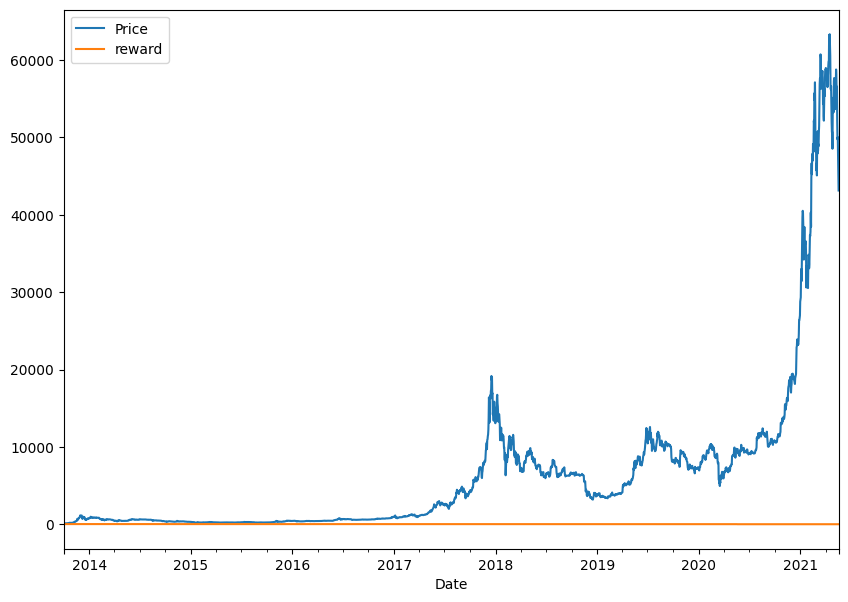

In [76]:
bitcoin_prices_block.plot(figsize = (10,7))

<Axes: xlabel='Date'>

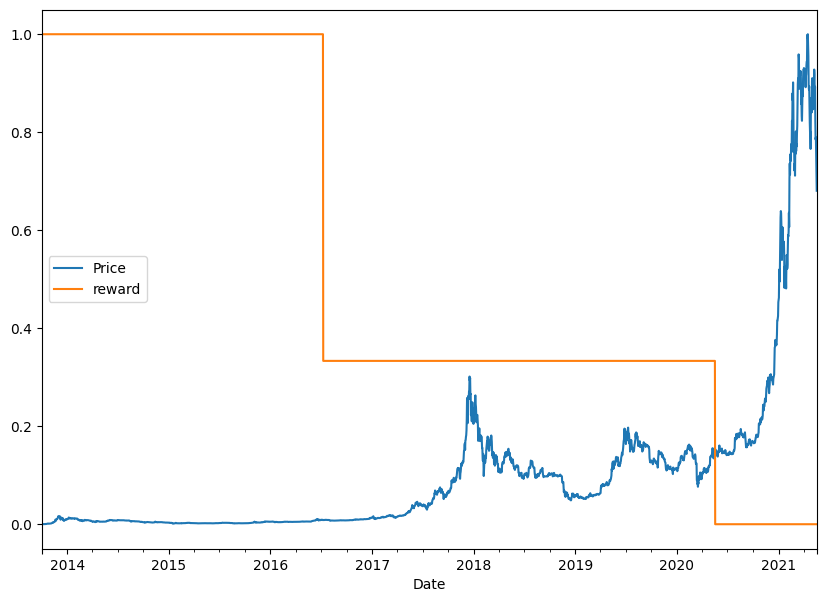

In [77]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10,7))

In [78]:
# making a windowed dataset out of our multivariate dataset since our old functions are only useful for univariate data
# we will use the pandas datafram shift method to window our multivariate data
# setting up the dataset hyper parameters
HORIZON, WINDOW_SIZE

(1, 7)

In [79]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [80]:
bitcoin_prices_windowed.head()

,Price,reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [81]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i+1)
bitcoin_prices_windowed.head(10)

,Price,reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [82]:
# creating the x and y features
x = bitcoin_prices_windowed.dropna().drop("Price",axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [83]:
split_size = int(len(x) * 0.8)
x_train,y_train, x_test, y_test = x[:split_size],y[:split_size],x[split_size:],y[split_size:]
len(x_train),len(y_train),len(x_test),len(y_test)

(2224, 2224, 556, 556)

In [84]:
# building a multivariate model using the same architecture as model1
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model6_dense_multi")

model_6.compile(loss = "mae",
                optimizer = "Adam")

history6 = model_6.fit(x_train,
                       y_train,
                       epochs = 100,
                       validation_data = (x_test, y_test),
                       verbose = 1,
                       batch_size = 128,
                       callbacks = [create_model_checkpoint(model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 3236.7354 

18/18 [==============================] - 2s 66ms/step - loss: 3236.7354 - val_loss: 9243.1855
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1106.2096

18/18 [==============================] - 1s 47ms/step - loss: 585.5688 - val_loss: 2549.2617
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 356.6817

18/18 [==============================] - 1s 34ms/step - loss: 282.2692 - val_loss: 1193.4510
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 225.6047 - val_loss: 1236.1270
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 195.8831

18/18 [==============================] - 1s 33ms/step - loss: 209.0354 - val_loss: 1174.2896
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 162.8097

18/18 [==============================] - 1s 34ms/step - loss: 209.7323 - val_loss: 1129.4583
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 251.0061

18/18 [==============================] - 1s 34ms/step - loss: 205.6629 - val_loss: 1101.6353
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 183.8644

18/18 [==============================] - 1s 66ms/step - loss: 196.4529 - val_loss: 1095.6617
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 191.8952 - val_loss: 1105.4567
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 210.5076

18/18 [==============================] - 1s 38ms/step - loss: 188.3616 - val_loss: 1050.5704
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 212.5253

18/18 [==============================] - 1s 37ms/step - loss: 184.7050 - val_loss: 1012.3343
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 180.5390 - val_loss: 1045.0667
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 141.3720

18/18 [==============================] - 1s 36ms/step - loss: 175.2350 - val_loss: 1009.3666
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 197.9254

18/18 [==============================] - 1s 35ms/step - loss: 169.9924 - val_loss: 956.8257
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 166.8184 - val_loss: 988.2106
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 160.4883

18/18 [==============================] - 1s 35ms/step - loss: 161.8800 - val_loss: 908.8960
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9708

18/18 [==============================] - 1s 35ms/step - loss: 158.1355 - val_loss: 902.3860
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 156.3303

18/18 [==============================] - 1s 34ms/step - loss: 153.7102 - val_loss: 877.1581
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 81.9512

18/18 [==============================] - 1s 33ms/step - loss: 148.6954 - val_loss: 853.6294
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 155.8813

18/18 [==============================] - 1s 35ms/step - loss: 146.6360 - val_loss: 806.0781
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 195.7434

18/18 [==============================] - 1s 36ms/step - loss: 144.1210 - val_loss: 783.5887
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 186.5215

18/18 [==============================] - 1s 50ms/step - loss: 140.6338 - val_loss: 771.6331
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 151.9284

18/18 [==============================] - 1s 49ms/step - loss: 137.7161 - val_loss: 758.6411
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 153.2340

18/18 [==============================] - 1s 51ms/step - loss: 134.6143 - val_loss: 737.0690
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 134.4671

18/18 [==============================] - 1s 34ms/step - loss: 132.3600 - val_loss: 731.5394
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 135.8418 - val_loss: 751.9968
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 201.5283

18/18 [==============================] - 1s 33ms/step - loss: 130.5983 - val_loss: 702.6342
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1282

18/18 [==============================] - 1s 34ms/step - loss: 126.2750 - val_loss: 701.1636
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 123.0273

18/18 [==============================] - 1s 34ms/step - loss: 124.9685 - val_loss: 697.1119
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 129.3220 - val_loss: 723.6477
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 132.1664 - val_loss: 804.9126
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 129.9410 - val_loss: 719.2410
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 121.8584 - val_loss: 728.5009
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 150.8682

18/18 [==============================] - 1s 35ms/step - loss: 123.6815 - val_loss: 665.4777
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 105.9638

18/18 [==============================] - 1s 35ms/step - loss: 120.5135 - val_loss: 647.5853
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 124.4204 - val_loss: 716.9340
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 158.4297

18/18 [==============================] - 1s 66ms/step - loss: 120.2938 - val_loss: 636.2443
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 111.9511

18/18 [==============================] - 1s 38ms/step - loss: 119.2601 - val_loss: 630.6093
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9331

18/18 [==============================] - 1s 36ms/step - loss: 117.4459 - val_loss: 626.0753
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 108.4268

18/18 [==============================] - 1s 35ms/step - loss: 116.6569 - val_loss: 622.4272
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 109.7727

18/18 [==============================] - 1s 34ms/step - loss: 116.1662 - val_loss: 620.5932
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3772 - val_loss: 631.2312
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 116.3811 - val_loss: 625.7755
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 116.0876 - val_loss: 622.6397
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 79.8647

18/18 [==============================] - 1s 35ms/step - loss: 114.6770 - val_loss: 609.9033
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 87.9889

18/18 [==============================] - 1s 34ms/step - loss: 114.9090 - val_loss: 605.1393
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 116.1945 - val_loss: 720.2845
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9180 - val_loss: 621.6951
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5664 - val_loss: 611.7643
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 136.5340

18/18 [==============================] - 1s 36ms/step - loss: 115.4654 - val_loss: 604.5108
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 92.9542

18/18 [==============================] - 1s 50ms/step - loss: 113.8718 - val_loss: 597.6021
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4594

18/18 [==============================] - 1s 50ms/step - loss: 112.8709 - val_loss: 595.2559
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8729 - val_loss: 637.3077
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1138 - val_loss: 651.7770
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4154 - val_loss: 609.4410
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1202 - val_loss: 693.2291
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 106.5994

18/18 [==============================] - 1s 43ms/step - loss: 114.1131 - val_loss: 594.5663
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1198 - val_loss: 620.1427
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3703 - val_loss: 619.3096
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4342 - val_loss: 624.0649
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 141.5800

18/18 [==============================] - 1s 34ms/step - loss: 112.1377 - val_loss: 588.0599
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 76.9637

18/18 [==============================] - 1s 33ms/step - loss: 108.8697 - val_loss: 584.9857
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2916 - val_loss: 626.3202
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9677 - val_loss: 598.2133
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 128.3245

18/18 [==============================] - 1s 35ms/step - loss: 110.5808 - val_loss: 580.2473
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6287 - val_loss: 581.0579
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4048 - val_loss: 635.2074
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3911 - val_loss: 643.5050
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 130.6739 - val_loss: 688.5598
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 127.7356 - val_loss: 584.6509
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0203 - val_loss: 621.9730
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 108.8001 - val_loss: 584.9672
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5552 - val_loss: 690.9639
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 35ms/step - loss: 107.9939 - val_loss: 574.5772
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 196.7052

18/18 [==============================] - 1s 34ms/step - loss: 115.2264 - val_loss: 572.6438
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8843 - val_loss: 656.5721
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1001 - val_loss: 579.3468
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6855 - val_loss: 590.2671
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5405 - val_loss: 591.3080
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5892 - val_loss: 586.1028
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3619 - val_loss: 601.4896
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4304 - val_loss: 590.2257
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0948 - val_loss: 626.2055
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 34ms/step - loss: 106.2904 - val_loss: 569.1046
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7124 - val_loss: 653.0350
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4677 - val_loss: 572.9615
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8879 - val_loss: 569.7026
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 148.7780

18/18 [==============================] - 1s 34ms/step - loss: 106.8563 - val_loss: 568.6459
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4009 - val_loss: 672.8640


In [85]:
multi_evaluate = model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 672.8640


In [86]:
# now we are gonna start working with nbeats algorithm for time series forecasting

In [87]:
# we will now use tesnroflow layer subclassing to mke custom layers and get experience using the functional api to create
# a custom architecture and get state of the art results on our problem
# replicating the nbeat algorthm paperbuilding and testing the nbeats algorithm


In [88]:
# create nbeats bblock custom layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    #block containts stack of 4 fully connected layer each with a relu activation

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)

    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size],theta[:,-self.horizon:]
    return backcast, forecast

In [89]:
# creating and testing
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE+HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [90]:
# creating dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [91]:
# passing the dummy inputs passing it through the layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

In [92]:
backcast, forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.24967691, -0.03789772,  0.6586821 , -0.19240949, -0.11377527,
          0.53136176,  1.31914   ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.31067315]], dtype=float32)>)

In [93]:
# prepraring actual data for the algorithm

HORIZON = 1
WINDOW_SIZE  = 7

# create the NBEATS data series because it works with univariate series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [94]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Prices+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)



In [95]:
#  make features and labels
x = bitcoin_prices_nbeats.dropna().drop("Price",axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

In [96]:
split_size = int(len(x)*0.8)

x_train, y_train = x[:split_size], y[:split_size]

x_test, y_test = x[split_size:], y[split_size:]
len(x_train), len(x_test)

(2224, 556)

In [97]:
# time to make our dataset performant
train_feature_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_feature_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)



# combine labels and features
train_dataset = tf.data.Dataset.zip((train_feature_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_feature_dataset, test_labels_dataset))

In [98]:
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [99]:
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [100]:
# setting up hyperparameters for nbeats algorithm
# values from nbeats paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = WINDOW_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [101]:
# we will now be working with ensemble learning
# double residual stacking
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [102]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [103]:
subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1,tensor_2])

subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [104]:
%%time
tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = "initialblock")

input = layers.Input(shape = (INPUT_SIZE), name = "stack_input")

residuals, forecast = nbeats_block_layer(input)

for i,_ in enumerate(range(N_STACKS - 1)):
  backcast,block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = f"NBEATSBLOCK{i}")(residuals)


CPU times: user 2.05 s, sys: 174 ms, total: 2.23 s
Wall time: 2.16 s


In [105]:
# now we will be working with ensemble of models

# we might have to repeat the nbeat algorithm because i lack the conceptual clarity for the same
# we will be leveraging the performance of various models

HORIZON, WINDOW_SIZE = 1,7

# constructing and fitting an ensemble of models
def get_ensemble_model(horion = HORIZON,
                       train_data = train_dataset,
                       test_data = test_dataset,
                       num_iter = 10,
                       num_epochs = 1000,
                       loss_fn = ["mae","mse","mape"]):
  """

  returna a list of num_iter models each trined on the given loss functions

  """
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} and model number {i}")

      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128,kernel_initializer = "he_normal", activation = "relu"),
          tf.keras.layers.Dense(128, kernel_initializer = "he_normal",activation = "relu"),
          tf.keras.layers.Dense(HORIZON, activation = "linear")
      ])


      model.compile(loss = loss_function,
                    optimizer = "Adam",
                    metrics = ["mae","mse"])

      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                  patience = 100,
                                                                  verbose = 1)])

      ensemble_models.append(model)
  return ensemble_models

In [106]:
ensemble_models = get_ensemble_model(num_iter = 5,
                                      num_epochs =1000)

Optimizing model by reducing: mae for 1000 and model number 0

Epoch 833: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 and model number 0

Epoch 376: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 476: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 and model number 0

Epoch 213: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 313: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 and model number 1

Epoch 887: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 and model number 1

Epoch 723: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 823: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 and m

In [107]:
# with an ensemble model there are tradoffs such as longer training and prediction time
ensemble_models

In [108]:
# creating a function to make predictions and return them

def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(tf.squeeze(preds))
  return tf.constant(tf.squeeze(ensemble_preds))


In [109]:
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)

ensemble_preds

1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 48ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8785.511,  8718.73 ,  9115.506, ..., 49602.816, 48148.355,
        46340.785],
       [ 8742.671,  8739.71 ,  9033.384, ..., 50363.363, 48322.81 ,
        46965.953],
       [ 8766.486,  8804.844,  9067.822, ..., 49303.41 , 47903.406,
        45253.324],
       ...,
       [ 8720.265,  8767.454,  9216.937, ..., 50669.348, 49530.63 ,
        46097.094],
       [ 8774.95 ,  8796.128,  9065.083, ..., 49807.047, 48268.117,
        46632.723],
       [ 8793.067,  8818.474,  9079.843, ..., 49877.812, 48142.367,
        46576.65 ]], dtype=float32)>

In [110]:
len(ensemble_preds)

15

In [111]:
# finding the upper and lower bounds of prediction
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis = 0)

  # multiply the standard deviation by 1.96
  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis = 0)

  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [112]:
lower,upper = get_upper_lower(ensemble_preds)

In [113]:
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8713.758 , 8712.241 , 8991.62  , 8638.243 , 8644.391 , 8667.    ,
        8579.568 , 8413.221 , 8409.4795, 8485.761 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8842.014, 8843.022, 9162.917, 8799.903, 8855.307, 8813.65 ,
        8740.232, 8550.473, 8525.464, 8569.087], dtype=float32)>)

In [114]:
# working with future predcition model
# train a model on full historical data to make predictions into the future

bitcoin_prices_windowed.head()

,Price,reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [117]:
# training the model on entire data to make predictions on the entire day

X_all = bitcoin_prices_windowed.dropna().drop(["Price","reward"], axis = 1).to_numpy()
Y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
X_all[:10], Y_all[:10]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

In [118]:
feature_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(Y_all)
dataset_all = tf.data.Dataset.zip((feature_dataset_all, labels_dataset_all))
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [120]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")

], name = "model9future")


model9.compile(loss = "mae",
               optimizer = "Adam")


model9.fit(dataset_all,
           epochs = 100,
           verbose = 0)


In [ ]:
# making predictions into the future
INTO_FUTURE = 14

